In [1]:
import ROOT
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib import pylab
import unicodedata

Welcome to JupyROOT 6.20/04


In [2]:
# read in data
inFile1 = ROOT . TFile . Open ( "ttH_mc16a_mc16d_me16e_merge.root" , " READ " )
tree1 = inFile1 . Get ( "ttHyyTree" )

inFile2 = ROOT . TFile . Open ( "ttgammgamma_mc16a_mc16d_mc16e_merge.root" , " READ " )
tree2 = inFile2 . Get ( "ttHyyTree" )

ReadStreamerInfo, class:string, illegal uid=-2
ReadStreamerInfo, class:string, illegal uid=-2


Warning in <TClass::Init>: no dictionary for class xAOD::EventFormat_v1 is available
Warning in <TClass::Init>: no dictionary for class xAOD::AuxInfoBase is available
Warning in <TClass::Init>: no dictionary for class SG::IAuxStore is available
Warning in <TClass::Init>: no dictionary for class SG::IConstAuxStore is available
Warning in <TClass::Init>: no dictionary for class SG::IAuxStoreIO is available
Warning in <TClass::Init>: no dictionary for class SG::IAuxStoreHolder is available
Warning in <TClass::Init>: no dictionary for class SG::AuxElement is available
Warning in <TClass::Init>: no dictionary for class SG::IAuxElement is available
Warning in <TClass::Init>: no dictionary for class xAOD::FileMetaData_v1 is available
Warning in <TClass::Init>: no dictionary for class xAOD::FileMetaDataAuxInfo_v1 is available


In [3]:
# ttHyy variables
t1 = []
t2 = []
w1 = []
w2 = []
h = []
tth = []
tt = []
t = []
thetah = []
thetat = []
phitstar = []
thetaw = []
phiw = []
thetab = []
phib = []
thetaf = []
phif = []

y1pt = []
y2pt = []

In [4]:
# ttyy variables: sideband
t1s = []
t2s = []
w1s = []
w2s = []
hs = []
tths = []
tts = []
ts = []
thetahs = []
thetats = []
phitstars = []
thetaws = []
phiws = []
thetabs = []
phibs = []
thetafs = []
phifs = []

y1pts = []
y2pts = []

In [5]:
# ttHyy variables: near higgs region
t1n = []
t2n = []
w1n = []
w2n = []
hn = []
tthn = []
ttn = []
tn = []
thetahn = []
thetatn = []
phitstarn = []
thetawn = []
phiwn = []
thetabn = []
phibn = []
thetafn = []
phifn = []

y1ptn = []
y2ptn = []

In [6]:
# cos of 2 vectors
def angle (v1, v2):
  dot = v1[0]*v2[0] + v1[1]*v2[1] + v1[2]*v2[2]
  m1 = np.sqrt(v1[0]**2 + v1[1]**2 + v1[2]**2)
  m2 = np.sqrt(v2[0]**2 + v2[1]**2 + v2[2]**2)
  return dot/(m1*m2)

# cross production of 2 vectors
def cross (v1,v2):
  c1 = v1[1]*v2[2] - v2[1]*v1[2]
  c2 = v1[2]*v2[0] - v1[0]*v2[2]
  c3 = v1[0]*v2[1] - v2[0]*v1[1]
  return [c1,c2,c3]

In [7]:
def analysis(tree):


  for entryNum1 in range (0 , tree . GetEntries ()):
    # read
    tree . GetEntry ( entryNum1 )

    # Event selection: 4jets, 2bjets, 1lepton
    btag = 0
    
    # 4jets
    if len(getattr(tree, "jet_pt")) != 4:
      continue
    
    # 2bjets
    for i in getattr ( tree , "jet_btag85" ):
      if i:
        btag = btag + 1
    if btag != 2:
      continue

    # 1lepton
    if len(getattr ( tree , "el_eta" )) + len(getattr ( tree , "mu_eta" )) != 1:
      continue

    # Lorentz vectors
    # lepton
    lepton = ROOT . TLorentzVector ()

    if len(getattr ( tree , "el_eta" )) == 1 and len(getattr ( tree , "mu_eta" )) == 0:
      lpt = getattr ( tree , "el_pt" )
      leta = getattr ( tree , "el_eta" )
      lphi = getattr ( tree , "el_phi" )
      lm = 0.000511 # electron mass

    if len(getattr ( tree , "mu_eta" )) == 1 and len(getattr ( tree , "el_eta" )) == 0:
      lpt = getattr ( tree , "mu_pt" )
      leta = getattr ( tree , "mu_eta" )
      lphi = getattr ( tree , "mu_phi" )
      lm = 0.10566 # muon mass

    lepton . SetPtEtaPhiM ( lpt[0] , leta[0] , lphi[0] , lm) 


    # jets
    q1 = ROOT . TLorentzVector ()
    q2 = ROOT . TLorentzVector ()
    b1 = ROOT . TLorentzVector ()
    b2 = ROOT . TLorentzVector ()

    jpt = getattr ( tree , "jet_pt" )
    jeta = getattr ( tree , "jet_eta" )
    jphi = getattr ( tree , "jet_phi" )
    jE = getattr ( tree, "jet_E" )    
    isb = getattr ( tree , "jet_btag85" )

    if isb[0]:
      b1 . SetPtEtaPhiE (jpt[0] , jeta[0] , jphi[0] , jE[0])
      if isb[1]:
        b2 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
        q1 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
      else:
        q1 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
        if isb[2]:
          b2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
          q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
        else:
          q2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
          b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])

    else:
      q1 . SetPtEtaPhiE (jpt[0] , jeta[0] , jphi[0] , jE[0])
      if isb[1]:
        b1 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
        if isb[2]:
          b2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
          q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
        else:
          q2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
          b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
        
      else:
        q2 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
        b1 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])

    
    # neutrino
    nu = ROOT . TLorentzVector ()
    npx = - getattr ( tree , "met_x" )
    npy = - getattr ( tree , "met_y" )

    # neutrino Pz: assume m_w = 80.379 GeV
    
    A = 2 * lepton.Pz()
    B = -2 * lepton.E()
    C = npx**2+npy**2
    D = lepton.M()**2 - 80.379**2 - 2*lepton.Px()*npx - 2*lepton.Py()*npy
    E = A*A*D*D - (A**2-B**2)*(D**2-B*B*C)

    if E<0:
      E = 0
    
    # Ambiguity of +-
    npz1 = (A*D + np.sqrt(E))/(A**2 - B**2)
    nE1 = np.sqrt(npx**2+npy**2+npz1**2)
    
    npz2 = (A*D - np.sqrt(E))/(A**2 - B**2)
    nE2 = np.sqrt(npx**2+npy**2+npz2**2)
    
    nu1 = ROOT . TLorentzVector ()
    nu2 = ROOT . TLorentzVector ()
    
    nu1 . SetPxPyPzE ( npx , npy , npz1 , nE1)
    nu2 . SetPxPyPzE ( npx , npy , npz2 , nE2)
    
    # t = l + v + b, choose the one closest to mt
    
    t11 = abs((lepton + nu1 + b1).M() - 173)
    t12 = abs((lepton + nu1 + b2).M() - 173)
    
    t21 = abs((lepton + nu2 + b1).M() - 173)
    t22 = abs((lepton + nu2 + b2).M() - 173)
    
    if t11 == min(t11, t12, t21, t22) or t12 == min(t11, t12, t21, t22):
      nu = nu1
    
    else:
      nu = nu2

    # photon
    y0 = ROOT . TLorentzVector ()
    y1 = ROOT . TLorentzVector ()

    # y0
    pt0 = getattr ( tree , "y1_pt" )
    eta0 = getattr ( tree , "y1_eta" )
    phi0 = getattr ( tree , "y1_phi" )
    nrg0 = getattr ( tree , "y1_E" )
    y0 . SetPtEtaPhiE ( pt0 , eta0 , phi0 , nrg0)

    # y1
    pt1 = getattr ( tree , "y2_pt" )
    eta1 = getattr ( tree , "y2_eta" )
    phi1 = getattr ( tree , "y2_phi" )
    nrg1 = getattr ( tree , "y2_E" )
    y1 . SetPtEtaPhiE ( pt1 , eta1 , phi1 , nrg1)

    # Higgs mass
    higgs = y0 + y1
    higgsMass = higgs . M ()

    # W mass
    wlv = lepton + nu     # w1
    w1m = wlv.M()

    wqq = q1 + q2      # w2
    w2m = wqq.M()

    # Top mass
    w1b1 = (wlv + b1).M()
    w2b2 = (wqq + b2).M()

    w1b2 = (wlv + b2).M()
    w2b1 = (wqq + b1).M()

    chi1 = (w1b1 - 173)**2 + (w2b2 - 173)**2
    chi2 = (w1b2 - 173)**2 + (w2b1 - 173)**2

    if chi1 <= chi2:
      tlvb = w1b1
      tv1 = wlv + b1
    
      tqqb = w2b2
      tv2 = wqq + b2

    else:
      tlvb = w1b2
      tv1 = wlv + b2
    
      tqqb = w2b1
      tv2 = wqq + b1
  
    #### 1 ####
    # ttH mass
    tthv = lepton + nu + b1 + b2 + q1 + q2 + y0 + y1
    tthm = (lepton + nu + b1 + b2 + q1 + q2 + y0 + y1).M()

    #### 2 ####
    # tt mass
    ttv = lepton + nu + b1 + b2 + q1 + q2
    ttm = (lepton + nu + b1 + b2 + q1 + q2).M()

    #### 3 ####
    # top mass, done before  
    
    #### 4 ####
    # cos(θ_H): angle between the H boson direction and the incoming partons in the ttH frame
    
    # Boost vector
    tth_b = tthv.BoostVector()
    # incoming parton
    parton = ROOT . TLorentzVector ()
    parton. SetPxPyPzE ( 0 , 0 , 1 , 1)
    
    # Boost higgs and incoming partons
    tv1.Boost(-tth_b)
    tv2.Boost(-tth_b)
    higgs.Boost(-tth_b)
    parton.Boost(-tth_b)
    
    H_d = ROOT.TVector3()
    H_d.SetXYZ(higgs.Px(), higgs.Py(), higgs.Pz())
    beam_d = ROOT.TVector3()
    beam_d.SetXYZ(parton.Px(), parton.Py(), parton.Pz())
    theta_H = np.cos(H_d.Angle(beam_d))
    
    # Return to the rest frame
    
    higgs.Boost(tth_b)
    parton.Boost(tth_b)
    tv1.Boost(tth_b)
    tv2.Boost(tth_b)
  
    #### 5 ####
    # cos(θ_t): angle between the top quark direction and the opposite Higgs direction in the tt frame
    # Boost vector
    tt_b = ttv.BoostVector()
    
    # Boost Top and Higgs vector
    tv1.Boost(-tt_b)
    tv2.Boost(-tt_b)
    higgs.Boost(-tt_b)
  
    # Directions in tt frame
    H_ttd = ROOT.TVector3()
    t1_ttd = ROOT.TVector3()
    t2_ttd = ROOT.TVector3()
    
    H_ttd.SetXYZ(-higgs.Px(), -higgs.Py(), -higgs.Pz())
    t1_ttd.SetXYZ(tv1.Px(), tv1.Py(), tv1.Pz())
    t2_ttd.SetXYZ(tv2.Px(), tv2.Py(), tv2.Pz())
    theta_t1 = np.cos(H_ttd.Angle(t1_ttd))
    theta_t2 = np.cos(H_ttd.Angle(t2_ttd))

    # Return to lab frame
    tv1.Boost(tt_b)
    tv2.Boost(tt_b)
    higgs.Boost(tt_b)

    #### 6 ####
    # Φ*t: angle between the decay planes of the tt system and H → VV in the ttH frame
    
    # Boost higgs, y0, y1, t1, t2
    tv1.Boost(-tth_b)
    tv2.Boost(-tth_b)
    higgs.Boost(-tth_b)
    y0.Boost(-tth_b)
    y1.Boost(-tth_b)
    
    
    H_ld = [higgs.Px(), higgs.Py(), higgs.Pz()]
    y0_ld = [y0.Px(), y0.Py(), y0.Pz()]
    y1_ld = [y1.Px(), y1.Py(), y1.Pz()]
    t1_ld = [tv1.Px(), tv1.Py(), tv1.Pz()]
    t2_ld = [tv2.Px(), tv2.Py(), tv2.Pz()]
    plane_tt = cross(t1_ld, t2_ld)
    plane_Hyy = cross(y0_ld, y1_ld)
    phit = np.arccos(angle(plane_tt, plane_Hyy))
    
    # Return to lab frame
    tv1.Boost(tth_b)
    tv2.Boost(tth_b)
    higgs.Boost(tth_b)
    y0.Boost(tth_b)
    y1.Boost(tth_b)

    #### 7 ####
    # cos(θ_W) : angle between W+ and opposite of the bb̄ system in the W+ W− frame
    # Boost vector
    ww = wlv + wqq
    bb = b1 + b2
    ww_b = ww.BoostVector()

    # Boost W and bb vector
    wlv.Boost(-ww_b)
    wqq.Boost(-ww_b)
    bb.Boost(-ww_b)

    # Directions in WW frame
    bb_wwd = ROOT.TVector3()
    w1_wwd = ROOT.TVector3()
    w2_wwd = ROOT.TVector3()
    
    bb_wwd.SetXYZ(-bb.Px(), -bb.Py(), -bb.Pz())
    w1_wwd.SetXYZ(wlv.Px(), wlv.Py(), wlv.Pz())
    w2_wwd.SetXYZ(wqq.Px(), wqq.Py(), wqq.Pz())

    theta_w1 = np.cos(w1_wwd.Angle(bb_wwd))
    theta_w2 = np.cos(w2_wwd.Angle(bb_wwd))

    # Return to lab frame
    wlv.Boost(ww_b)
    wqq.Boost(ww_b)
    bb.Boost(ww_b)

    #### 8 ####
    # Φw: angle between the production (bb̄)(W+W−)H plane and the plane of the W+W− system in the tt frame
    # Boost
    bb.Boost(-tt_b)
    higgs.Boost(-tt_b)
    wlv.Boost(-tt_b)
    wqq.Boost(-tt_b)

   # Cross product
    bb_ttd = [bb.Px(), bb.Py(), bb.Pz()]
    h_ttd = [higgs.Px(), higgs.Py(), higgs.Pz()]
    w1_ttd = [wlv.Px(), wlv.Py(), wlv.Pz()]
    w2_ttd = [wqq.Px(), wqq.Py(), wqq.Pz()]

    plane_bbwwh = cross(bb_ttd, h_ttd)
    plane_ww = cross(w1_ttd, w2_ttd)
    phi_w = np.arccos(angle(plane_bbwwh, plane_ww))

    # Return to lab frame
    bb.Boost(tt_b)
    higgs.Boost(tt_b)
    wlv.Boost(tt_b)
    wqq.Boost(tt_b)

    #### 9 ####
    # cos(θ_b): angle between the b quark and opposite of the W + W − system in the bb̄ frame
    # Boost vector
    bb_b = bb.BoostVector()

   # Boost b and ww vector
    b1.Boost(-bb_b)
    b2.Boost(-bb_b)
    ww.Boost(-bb_b)

    # Directions in bb frame
    ww_bbd = ROOT.TVector3()
    b1_bbd = ROOT.TVector3()
    b2_bbd = ROOT.TVector3()
    
    ww_bbd.SetXYZ(-ww.Px(), -ww.Py(), -ww.Pz())
    b1_bbd.SetXYZ(b1.Px(), b1.Py(), b1.Pz())
    b2_bbd.SetXYZ(b2.Px(), b2.Py(), b2.Pz())
    theta_b1 = np.cos(ww_bbd.Angle(b1_bbd))
    theta_b2 = np.cos(ww_bbd.Angle(b2_bbd))

    # Return to lab frame
    b1.Boost(bb_b)
    b2.Boost(bb_b)
    ww.Boost(bb_b)

    #### 10 ####
    # Φb: angle between the planes of the bb and W+W− systems in the tt frame
    # Boost 
    b1.Boost(-tt_b)
    b2.Boost(-tt_b)

    # Cross product (w1w2 plane in tt frame already done in phi_w)
    b1_ttd = [b1.Px(), b1.Py(), b1.Pz()]
    b2_ttd = [b2.Px(), b2.Py(), b2.Pz()]
    plane_b1b2 = cross(b1_ttd, b2_ttd)
    phi_b = np.arccos(angle(plane_b1b2, plane_ww))

    # Return to lab frame
    b1.Boost(tt_b)
    b2.Boost(tt_b)

    #### 11 ####
    # cos(θ_f): angles between fermion direction and opposite of the b or b quark in the W+ or W− frame
    # Boost vector
    wlv_b = wlv.BoostVector()
    
    # Boost lepton, b1 and b2 vector
    lepton.Boost(-wlv_b)
    b1.Boost(-wlv_b)
    b2.Boost(-wlv_b)

    # Directions in w frame
    l_wd = ROOT.TVector3()
    b1_wd = ROOT.TVector3()
    b2_wd = ROOT.TVector3()
    
    l_wd.SetXYZ(lepton.Px(), lepton.Py(), lepton.Pz())
    b1_wd.SetXYZ(-b1.Px(), -b1.Py(), -b1.Pz())
    b2_wd.SetXYZ(-b2.Px(), -b2.Py(), -b2.Pz())

    if chi1 <= chi2:
      theta_f = np.cos(l_wd.Angle(b1_wd))
    else:
      theta_f = np.cos(l_wd.Angle(b2_wd))

    # Return to lab frame
    lepton.Boost(wlv_b)
    b1.Boost(wlv_b)
    b2.Boost(wlv_b)

    #### 12 ####
    # Φf: angle between the W+ or W− decay plane and the t-W+b or tW−b̄ plane in the t or t̄ quark frame
    # Boost vector
    tv1_b = tv1.BoostVector()

    # Boost lepton, neutrino, b1 and b2 vector
    lepton.Boost(-tv1_b)
    nu.Boost(-tv1_b)
    b1.Boost(-tv1_b)
    b2.Boost(-tv1_b)
    tv2.Boost(-tv1_b)

    # Cross product
    l_td = [lepton.Px(), lepton.Py(), lepton.Pz()]
    nu_td = [nu.Px(), nu.Py(), nu.Pz()]
    b1_td = [b1.Px(), b1.Py(), b1.Pz()]
    b2_td = [b2.Px(), b2.Py(), b2.Pz()]
    t2_td = [tv2.Px(), tv2.Py(), tv2.Pz()]

    plane_wwt = cross(l_td, nu)

    if chi1 <= chi2:
      plane_tlvb = cross(b1_td, t2_td)
    else:
      plane_tlvb = cross(b2_td, t2_td)

    phi_f = np.arccos(angle(plane_tlvb, plane_wwt))

    # Return to lab frame
    lepton.Boost(tv1_b)
    nu.Boost(tv1_b)
    b1.Boost(tv1_b)
    b2.Boost(tv1_b)
    tv2.Boost(tv1_b)


    # Fill the hist
    w1 . append ( w1m )
    w2 . append ( w2m )
    t1 . append ( tlvb )
    t2 . append ( tqqb )
    h . append ( higgsMass )
    tth . append ( tthm )
    tt . append ( ttm )
  #  t . append (tlvb)
    t . append (tqqb)
    thetah . append (theta_H)
  #  thetat . append (theta_t1)  
    thetat . append (abs(theta_t2))
    phitstar . append (phit)
  #  thetaw . append (theta_w1)  
    thetaw . append (abs(theta_w2))
    phiw . append (phi_w)
  #  thetab . append (theta_b1)  
    thetab . append (abs(theta_b2))
    phib . append (phi_b)
    thetaf . append (theta_f)
    phif . append (phi_f)
    
    y1pt.append(y0.Pt()/(y0+y1).M())
    y2pt.append(y1.Pt()/(y0+y1).M())

In [8]:
def bkg(tree):


  for entryNum1 in range (0 , tree . GetEntries ()):
    # read
    tree . GetEntry ( entryNum1 )

    # Event selection: 4jets, 2bjets, 1lepton
    btag = 0
    
    # 4jets
    if len(getattr(tree, "jet_pt")) != 4:
      continue
    
    # 2bjets
    for i in getattr ( tree , "jet_btag85" ):
      if i:
        btag = btag + 1
    if btag != 2:
      continue

    # 1lepton
    if len(getattr ( tree , "el_eta" )) + len(getattr ( tree , "mu_eta" )) != 1:
      continue

    # Lorentz vectors
    # lepton
    lepton = ROOT . TLorentzVector ()

    if len(getattr ( tree , "el_eta" )) == 1 and len(getattr ( tree , "mu_eta" )) == 0:
      lpt = getattr ( tree , "el_pt" )
      leta = getattr ( tree , "el_eta" )
      lphi = getattr ( tree , "el_phi" )
      lm = 0.000511 # electron mass

    if len(getattr ( tree , "mu_eta" )) == 1 and len(getattr ( tree , "el_eta" )) == 0:
      lpt = getattr ( tree , "mu_pt" )
      leta = getattr ( tree , "mu_eta" )
      lphi = getattr ( tree , "mu_phi" )
      lm = 0.10566 # muon mass

    lepton . SetPtEtaPhiM ( lpt[0] , leta[0] , lphi[0] , lm) 


    # jets
    q1 = ROOT . TLorentzVector ()
    q2 = ROOT . TLorentzVector ()
    b1 = ROOT . TLorentzVector ()
    b2 = ROOT . TLorentzVector ()

    jpt = getattr ( tree , "jet_pt" )
    jeta = getattr ( tree , "jet_eta" )
    jphi = getattr ( tree , "jet_phi" )
    jE = getattr ( tree, "jet_E" )    
    isb = getattr ( tree , "jet_btag85" )

    if isb[0]:
      b1 . SetPtEtaPhiE (jpt[0] , jeta[0] , jphi[0] , jE[0])
      if isb[1]:
        b2 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
        q1 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
      else:
        q1 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
        if isb[2]:
          b2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
          q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
        else:
          q2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
          b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])

    else:
      q1 . SetPtEtaPhiE (jpt[0] , jeta[0] , jphi[0] , jE[0])
      if isb[1]:
        b1 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
        if isb[2]:
          b2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
          q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
        else:
          q2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
          b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
        
      else:
        q2 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
        b1 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])

    
    # neutrino
    nu = ROOT . TLorentzVector ()
    npx = - getattr ( tree , "met_x" )
    npy = - getattr ( tree , "met_y" )

    # neutrino Pz: assume m_w = 80.379 GeV
    
    A = 2 * lepton.Pz()
    B = -2 * lepton.E()
    C = npx**2+npy**2
    D = lepton.M()**2 - 80.379**2 - 2*lepton.Px()*npx - 2*lepton.Py()*npy
    E = A*A*D*D - (A**2-B**2)*(D**2-B*B*C)

    if E<0:
      E = 0
    
    # Ambiguity of +-
    npz1 = (A*D + np.sqrt(E))/(A**2 - B**2)
    nE1 = np.sqrt(npx**2+npy**2+npz1**2)
    
    npz2 = (A*D - np.sqrt(E))/(A**2 - B**2)
    nE2 = np.sqrt(npx**2+npy**2+npz2**2)
    
    nu1 = ROOT . TLorentzVector ()
    nu2 = ROOT . TLorentzVector ()
    
    nu1 . SetPxPyPzE ( npx , npy , npz1 , nE1)
    nu2 . SetPxPyPzE ( npx , npy , npz2 , nE2)
    
    # t = l + v + b, choose the one closest to mt
    
    t11 = abs((lepton + nu1 + b1).M() - 173)
    t12 = abs((lepton + nu1 + b2).M() - 173)
    
    t21 = abs((lepton + nu2 + b1).M() - 173)
    t22 = abs((lepton + nu2 + b2).M() - 173)
    
    if t11 == min(t11, t12, t21, t22) or t12 == min(t11, t12, t21, t22):
      nu = nu1
    
    else:
      nu = nu2

    # photon
    y0 = ROOT . TLorentzVector ()
    y1 = ROOT . TLorentzVector ()

    # y0
    pt0 = getattr ( tree , "y1_pt" )
    eta0 = getattr ( tree , "y1_eta" )
    phi0 = getattr ( tree , "y1_phi" )
    nrg0 = getattr ( tree , "y1_E" )
    y0 . SetPtEtaPhiE ( pt0 , eta0 , phi0 , nrg0)

    # y1
    pt1 = getattr ( tree , "y2_pt" )
    eta1 = getattr ( tree , "y2_eta" )
    phi1 = getattr ( tree , "y2_phi" )
    nrg1 = getattr ( tree , "y2_E" )
    y1 . SetPtEtaPhiE ( pt1 , eta1 , phi1 , nrg1)

    # Higgs mass
    higgs = y0 + y1
    higgsMass = higgs . M ()

    # W mass
    wlv = lepton + nu     # w1
    w1m = wlv.M()

    wqq = q1 + q2      # w2
    w2m = wqq.M()

    # Top mass
    w1b1 = (wlv + b1).M()
    w2b2 = (wqq + b2).M()

    w1b2 = (wlv + b2).M()
    w2b1 = (wqq + b1).M()

    chi1 = (w1b1 - 173)**2 + (w2b2 - 173)**2
    chi2 = (w1b2 - 173)**2 + (w2b1 - 173)**2

    if chi1 <= chi2:
      tlvb = w1b1
      tv1 = wlv + b1
    
      tqqb = w2b2
      tv2 = wqq + b2

    else:
      tlvb = w1b2
      tv1 = wlv + b2
    
      tqqb = w2b1
      tv2 = wqq + b1
  
    #### 1 ####
    # ttH mass
    tthv = lepton + nu + b1 + b2 + q1 + q2 + y0 + y1
    tthm = (lepton + nu + b1 + b2 + q1 + q2 + y0 + y1).M()

    #### 2 ####
    # tt mass
    ttv = lepton + nu + b1 + b2 + q1 + q2
    ttm = (lepton + nu + b1 + b2 + q1 + q2).M()

    #### 3 ####
    # top mass, done before  
    
    #### 4 ####
    # cos(θ_H): angle between the H boson direction and the incoming partons in the ttH frame
    
    # Boost vector
    tth_b = tthv.BoostVector()
    # incoming parton
    parton = ROOT . TLorentzVector ()
    parton. SetPxPyPzE ( 0 , 0 , 1 , 1)
    
    # Boost higgs and incoming partons
    tv1.Boost(-tth_b)
    tv2.Boost(-tth_b)
    higgs.Boost(-tth_b)
    parton.Boost(-tth_b)
    
    H_d = ROOT.TVector3()
    H_d.SetXYZ(higgs.Px(), higgs.Py(), higgs.Pz())
    beam_d = ROOT.TVector3()
    beam_d.SetXYZ(parton.Px(), parton.Py(), parton.Pz())
    theta_H = np.cos(H_d.Angle(beam_d))
    
    # Return to the rest frame
    
    higgs.Boost(tth_b)
    parton.Boost(tth_b)
    tv1.Boost(tth_b)
    tv2.Boost(tth_b)
  
    #### 5 ####
    # cos(θ_t): angle between the top quark direction and the opposite Higgs direction in the tt frame
    # Boost vector
    tt_b = ttv.BoostVector()
    
    # Boost Top and Higgs vector
    tv1.Boost(-tt_b)
    tv2.Boost(-tt_b)
    higgs.Boost(-tt_b)
  
    # Directions in tt frame
    H_ttd = ROOT.TVector3()
    t1_ttd = ROOT.TVector3()
    t2_ttd = ROOT.TVector3()
    
    H_ttd.SetXYZ(-higgs.Px(), -higgs.Py(), -higgs.Pz())
    t1_ttd.SetXYZ(tv1.Px(), tv1.Py(), tv1.Pz())
    t2_ttd.SetXYZ(tv2.Px(), tv2.Py(), tv2.Pz())
    theta_t1 = np.cos(H_ttd.Angle(t1_ttd))
    theta_t2 = np.cos(H_ttd.Angle(t2_ttd))

    # Return to lab frame
    tv1.Boost(tt_b)
    tv2.Boost(tt_b)
    higgs.Boost(tt_b)

    #### 6 ####
    # Φ*t: angle between the decay planes of the tt system and H → VV in the ttH frame
    
    # Boost higgs, y0, y1, t1, t2
    tv1.Boost(-tth_b)
    tv2.Boost(-tth_b)
    higgs.Boost(-tth_b)
    y0.Boost(-tth_b)
    y1.Boost(-tth_b)
    
    
    H_ld = [higgs.Px(), higgs.Py(), higgs.Pz()]
    y0_ld = [y0.Px(), y0.Py(), y0.Pz()]
    y1_ld = [y1.Px(), y1.Py(), y1.Pz()]
    t1_ld = [tv1.Px(), tv1.Py(), tv1.Pz()]
    t2_ld = [tv2.Px(), tv2.Py(), tv2.Pz()]
    plane_tt = cross(t1_ld, t2_ld)
    plane_Hyy = cross(y0_ld, y1_ld)
    phit = np.arccos(angle(plane_tt, plane_Hyy))
    
    # Return to lab frame
    tv1.Boost(tth_b)
    tv2.Boost(tth_b)
    higgs.Boost(tth_b)
    y0.Boost(tth_b)
    y1.Boost(tth_b)

    #### 7 ####
    # cos(θ_W) : angle between W+ and opposite of the bb̄ system in the W+ W− frame
    # Boost vector
    ww = wlv + wqq
    bb = b1 + b2
    ww_b = ww.BoostVector()

    # Boost W and bb vector
    wlv.Boost(-ww_b)
    wqq.Boost(-ww_b)
    bb.Boost(-ww_b)

    # Directions in WW frame
    bb_wwd = ROOT.TVector3()
    w1_wwd = ROOT.TVector3()
    w2_wwd = ROOT.TVector3()
    
    bb_wwd.SetXYZ(-bb.Px(), -bb.Py(), -bb.Pz())
    w1_wwd.SetXYZ(wlv.Px(), wlv.Py(), wlv.Pz())
    w2_wwd.SetXYZ(wqq.Px(), wqq.Py(), wqq.Pz())

    theta_w1 = np.cos(w1_wwd.Angle(bb_wwd))
    theta_w2 = np.cos(w2_wwd.Angle(bb_wwd))

    # Return to lab frame
    wlv.Boost(ww_b)
    wqq.Boost(ww_b)
    bb.Boost(ww_b)

    #### 8 ####
    # Φw: angle between the production (bb̄)(W+W−)H plane and the plane of the W+W− system in the tt frame
    # Boost
    bb.Boost(-tt_b)
    higgs.Boost(-tt_b)
    wlv.Boost(-tt_b)
    wqq.Boost(-tt_b)

   # Cross product
    bb_ttd = [bb.Px(), bb.Py(), bb.Pz()]
    h_ttd = [higgs.Px(), higgs.Py(), higgs.Pz()]
    w1_ttd = [wlv.Px(), wlv.Py(), wlv.Pz()]
    w2_ttd = [wqq.Px(), wqq.Py(), wqq.Pz()]

    plane_bbwwh = cross(bb_ttd, h_ttd)
    plane_ww = cross(w1_ttd, w2_ttd)
    phi_w = np.arccos(angle(plane_bbwwh, plane_ww))

    # Return to lab frame
    bb.Boost(tt_b)
    higgs.Boost(tt_b)
    wlv.Boost(tt_b)
    wqq.Boost(tt_b)

    #### 9 ####
    # cos(θ_b): angle between the b quark and opposite of the W + W − system in the bb̄ frame
    # Boost vector
    bb_b = bb.BoostVector()

   # Boost b and ww vector
    b1.Boost(-bb_b)
    b2.Boost(-bb_b)
    ww.Boost(-bb_b)

    # Directions in bb frame
    ww_bbd = ROOT.TVector3()
    b1_bbd = ROOT.TVector3()
    b2_bbd = ROOT.TVector3()
    
    ww_bbd.SetXYZ(-ww.Px(), -ww.Py(), -ww.Pz())
    b1_bbd.SetXYZ(b1.Px(), b1.Py(), b1.Pz())
    b2_bbd.SetXYZ(b2.Px(), b2.Py(), b2.Pz())
    theta_b1 = np.cos(ww_bbd.Angle(b1_bbd))
    theta_b2 = np.cos(ww_bbd.Angle(b2_bbd))

    # Return to lab frame
    b1.Boost(bb_b)
    b2.Boost(bb_b)
    ww.Boost(bb_b)

    #### 10 ####
    # Φb: angle between the planes of the bb and W+W− systems in the tt frame
    # Boost 
    b1.Boost(-tt_b)
    b2.Boost(-tt_b)

    # Cross product (w1w2 plane in tt frame already done in phi_w)
    b1_ttd = [b1.Px(), b1.Py(), b1.Pz()]
    b2_ttd = [b2.Px(), b2.Py(), b2.Pz()]
    plane_b1b2 = cross(b1_ttd, b2_ttd)
    phi_b = np.arccos(angle(plane_b1b2, plane_ww))

    # Return to lab frame
    b1.Boost(tt_b)
    b2.Boost(tt_b)

    #### 11 ####
    # cos(θ_f): angles between fermion direction and opposite of the b or b quark in the W+ or W− frame
    # Boost vector
    wlv_b = wlv.BoostVector()
    
    # Boost lepton, b1 and b2 vector
    lepton.Boost(-wlv_b)
    b1.Boost(-wlv_b)
    b2.Boost(-wlv_b)

    # Directions in w frame
    l_wd = ROOT.TVector3()
    b1_wd = ROOT.TVector3()
    b2_wd = ROOT.TVector3()
    
    l_wd.SetXYZ(lepton.Px(), lepton.Py(), lepton.Pz())
    b1_wd.SetXYZ(-b1.Px(), -b1.Py(), -b1.Pz())
    b2_wd.SetXYZ(-b2.Px(), -b2.Py(), -b2.Pz())

    if chi1 <= chi2:
      theta_f = np.cos(l_wd.Angle(b1_wd))
    else:
      theta_f = np.cos(l_wd.Angle(b2_wd))

    # Return to lab frame
    lepton.Boost(wlv_b)
    b1.Boost(wlv_b)
    b2.Boost(wlv_b)

    #### 12 ####
    # Φf: angle between the W+ or W− decay plane and the t-W+b or tW−b̄ plane in the t or t̄ quark frame
    # Boost vector
    tv1_b = tv1.BoostVector()

    # Boost lepton, neutrino, b1 and b2 vector
    lepton.Boost(-tv1_b)
    nu.Boost(-tv1_b)
    b1.Boost(-tv1_b)
    b2.Boost(-tv1_b)
    tv2.Boost(-tv1_b)

    # Cross product
    l_td = [lepton.Px(), lepton.Py(), lepton.Pz()]
    nu_td = [nu.Px(), nu.Py(), nu.Pz()]
    b1_td = [b1.Px(), b1.Py(), b1.Pz()]
    b2_td = [b2.Px(), b2.Py(), b2.Pz()]
    t2_td = [tv2.Px(), tv2.Py(), tv2.Pz()]

    plane_wwt = cross(l_td, nu)

    if chi1 <= chi2:
      plane_tlvb = cross(b1_td, t2_td)
    else:
      plane_tlvb = cross(b2_td, t2_td)

    phi_f = np.arccos(angle(plane_tlvb, plane_wwt))

    # Return to lab frame
    lepton.Boost(tv1_b)
    nu.Boost(tv1_b)
    b1.Boost(tv1_b)
    b2.Boost(tv1_b)
    tv2.Boost(tv1_b)


    # Variables: sideband
    if higgsMass < 120 or higgsMass > 130:

      w1s . append ( w1m )
      w2s . append ( w2m )
      t1s . append ( tlvb )
      t2s . append ( tqqb )
      hs . append ( higgsMass )
      tths . append ( tthm )
      tts . append ( ttm )
     # ts . append (tlvb)
      ts . append (tqqb)
      thetahs . append (theta_H)
     # thetats . append (theta_t1)
      thetats . append (abs(theta_t2))
      phitstars . append (phit)
    # thetaws . append (theta_w1)
      thetaws . append (abs(theta_w2))
      phiws . append (phi_w)
     # thetabs . append (theta_b1)
      thetabs . append (abs(theta_b2))
      phibs . append (phi_b)
      thetafs . append (theta_f)
      phifs . append (phi_f)
    
      y1pts.append(y0.Pt()/(y0+y1).M())
      y2pts.append(y1.Pt()/(y0+y1).M())
    


    else:
    
      w1n . append ( w1m )
      w2n . append ( w2m )
      t1n . append ( tlvb )
      t2n . append ( tqqb )
      hn . append ( higgsMass )
      tthn . append ( tthm )
      ttn . append ( ttm )
   #  tn . append (tlvb)
      tn . append (tqqb)
      thetahn . append (theta_H)
     # thetatn . append (theta_t1)
      thetatn . append (abs(theta_t2))
      phitstarn . append (phit)
     # thetawn . append (theta_w1)
      thetawn . append (abs(theta_w2))
      phiwn . append (phi_w)
     # thetabn . append (theta_b1)
      thetabn . append (abs(theta_b2))
      phibn . append (phi_b)
      thetafn . append (theta_f)
      phifn . append (phi_f)
    
      y1ptn.append(y0.Pt()/(y0+y1).M())
      y2ptn.append(y1.Pt()/(y0+y1).M())

In [9]:
def single(data1, data2, data3, num1, num2, num3, xmin, xmax, xname):
  plt.figure(figsize=(5,5))

  weights1 = np.ones_like(data1) / len(data1)
  weights2 = np.ones_like(data2) / len(data2)
  weights3 = np.ones_like(data3) / len(data3)

  plt.hist(data1, weights=weights1, bins=num1,range=[xmin,xmax], histtype='step',label='signal')
  plt.hist(data2, weights=weights2, bins=num2,range=[xmin,xmax], histtype='step',label='bkg:sideband')
  plt.hist(data3, weights=weights3, bins=num3,range=[xmin,xmax], histtype='step',label='CP_alpha = 60')
  plt.xlim(xmin,xmax)
  plt.xlabel(xname)
  plt.legend()
  plt.show()

def density(data1, data2, data3, num1, num2, num3, xmin, xmax, xname):

  plt.hist(data1, density=True, bins=num1,range=[xmin,xmax],histtype='step',label='signal')
  plt.hist(data2, density=True, bins=num2,range=[xmin,xmax], histtype='step',label='bkg:sideband')
  plt.hist(data3, density=True, bins=num3, range=[xmin,xmax],histtype='step',label='bkg:near signal')
  plt.xlim(xmin,xmax)
  plt.xlabel(xname,  fontsize=18)

def weight(data1, data2, data3, num1, num2, num3, xmin, xmax, xname):

  weights1 = np.ones_like(data1) / len(data1)
  weights2 = np.ones_like(data2) / len(data2)
  weights3 = np.ones_like(data3) / len(data3)

  plt.hist(data1, weights=weights1, bins=num1, histtype='step',label='signal')
  plt.hist(data2, weights=weights2, bins=num2, histtype='step',label='bkg:sideband')
  plt.hist(data3, weights=weights3, bins=num3, histtype='step',label='bkg:near signal')
  plt.xlim(xmin,xmax)
  plt.xlabel(xname,  fontsize=18)

In [10]:
analysis(tree1)

In [11]:
bkg(tree2)

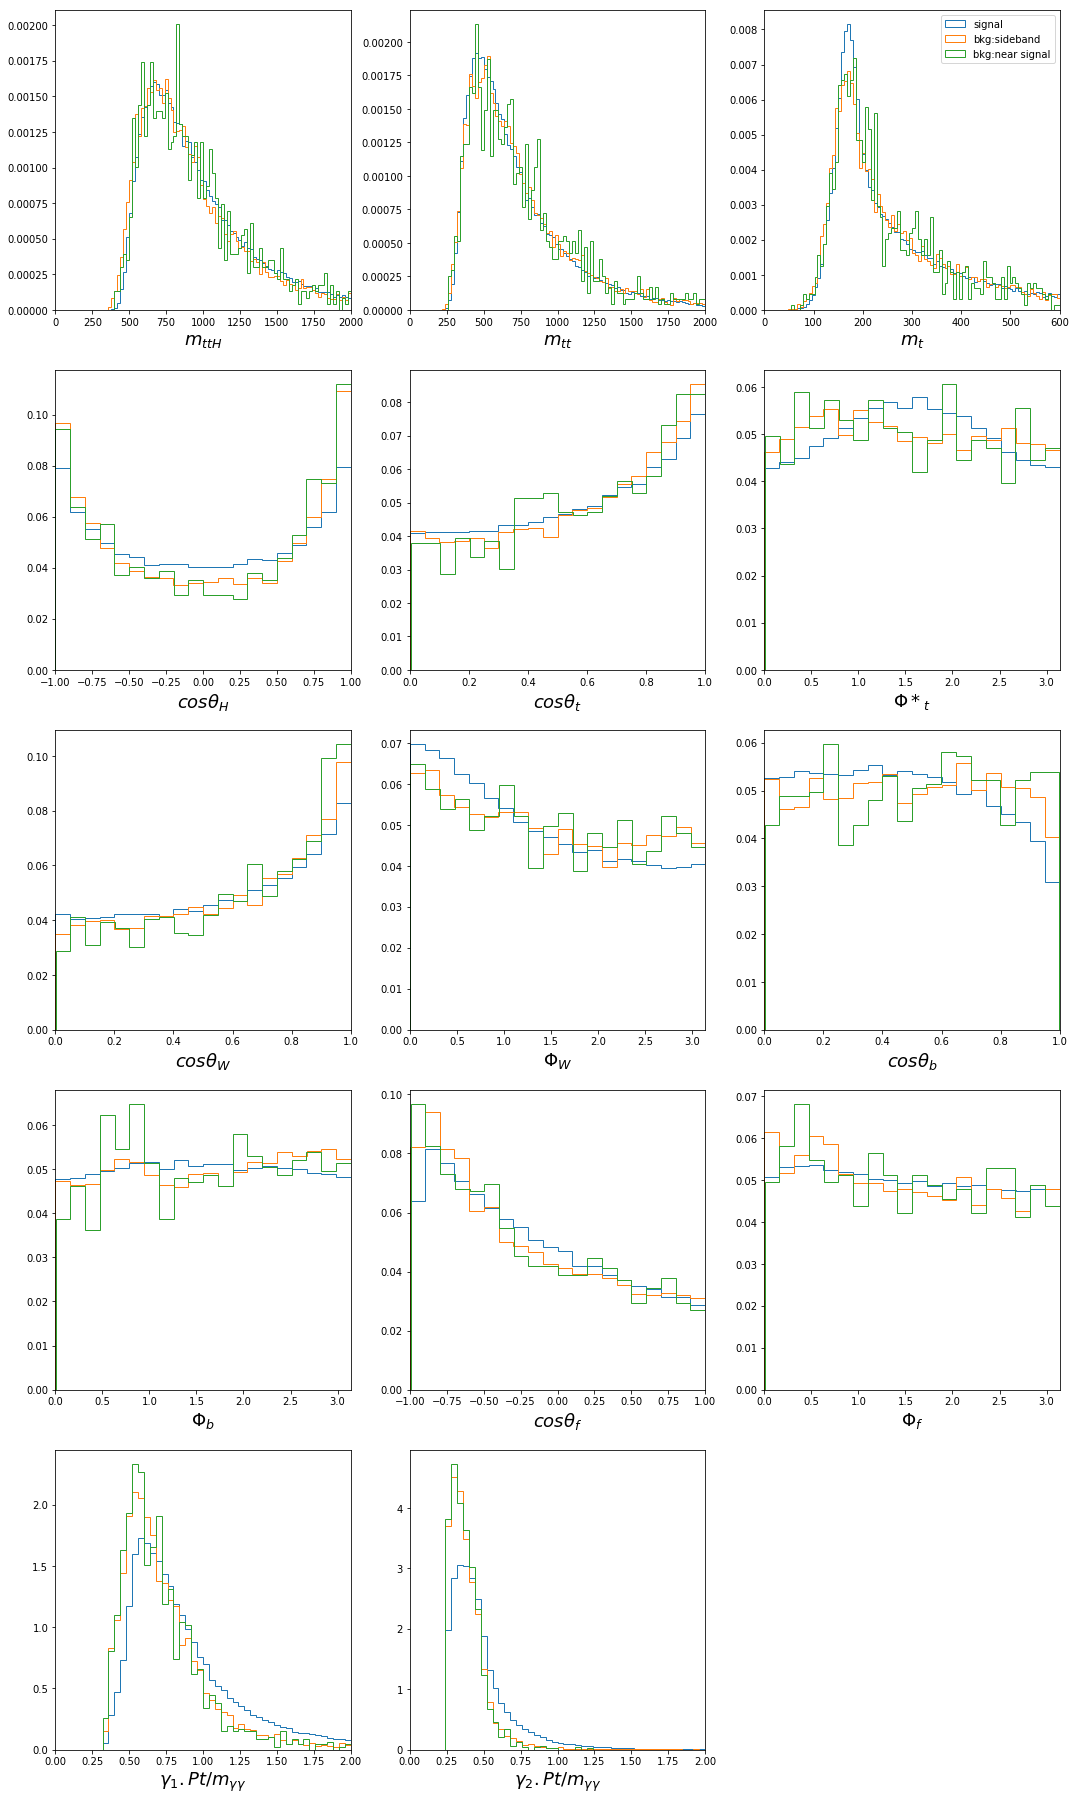

In [13]:
plt.figure(figsize=(18,32))

plt.subplot(5,3,1)
density(tth,tths,tthn,100,100,100,0,2000,r'$m_{ttH}$')

plt.subplot(5,3,2)
density(tt,tts,ttn,100,100,100,0,2000,r'$m_{tt}$')

plt.subplot(5,3,3)
density(t,ts,tn,100,100,100,0,600,r'$m_{t}$')

plt.legend()

plt.subplot(5,3,4)
weight(thetah,thetahs,thetahn,20,20,20,-1,1,r'$cos\theta_H$')

plt.subplot(5,3,5)
weight(thetat,thetats,thetatn,20,20,20,0,1,r'$cos\theta_t$')

plt.subplot(5,3,6)
weight(phitstar,phitstars,phitstarn,20,20,20,0,3.14,r'$\Phi*_t$')

plt.subplot(5,3,7)
weight(thetaw,thetaws,thetawn,20,20,20,0,1,r'$cos\theta_W$')

plt.subplot(5,3,8)
weight(phiw,phiws,phiwn,20,20,20,0,3.14,r'$\Phi_W$')

plt.subplot(5,3,9)
weight(thetab,thetabs,thetabn,20,20,20,0,1,r'$cos\theta_b$')

plt.subplot(5,3,10)
weight(phib,phibs,phibn,20,20,20,0,3.14,r'$\Phi_b$')

plt.subplot(5,3,11)
weight(thetaf,thetafs,thetafn,20,20,20,-1,1,r'$cos\theta_f$')

plt.subplot(5,3,12)
weight(phif,phifs,phifn,20,20,20,0,3.14,r'$\Phi_f$')

plt.subplot(5,3,13)
density(y1pt,y1pts,y1ptn,50,50,50,0,2,r'$\gamma_1.Pt/m_{\gamma \gamma}$')

plt.subplot(5,3,14)
density(y2pt,y2pts,y2ptn,50,50,50,0,2,r'$\gamma_2.Pt/m_{\gamma \gamma}$')


#plt.savefig('alpha1.pdf')
plt.show()
